# Figure 1: Dependence of Exobase Solutions on κ for SKD Electrons

This notebook reproduces **Figure 1** from the paper  
**"Kinetic-based macro-modeling of the solar wind at large heliocentric distances: Kappa electrons at the exobase"**  
(submitted to *JGR–Space Physics*).

The function **`solve_for_V0(kappa)`** numerically determines the characteristic electron escape speed $V_0$, by solving an equation **equivalent to Eq. (24)** in the paper:

\begin{equation}
\frac{w_{p0}}{w_{e0}} =
\frac{1+\kappa y }{\sqrt{\kappa}\,(\kappa-1)} \;
\frac{(1+y)^{-\kappa}}{
\displaystyle \frac{1}{2}\frac{\Gamma(\kappa-\tfrac{1}{2})}{\Gamma(\kappa+1)}+
\displaystyle \frac{B_{x_0}\!\big(\tfrac{3}{2},\,\kappa-\tfrac{1}{2}\big)}{\sqrt{\pi}}
}.
\end{equation}

Here,
\begin{equation}
y = \frac{V_0^{2}}{\kappa\, w_{e0}^{2}}, 
\qquad
x_0 = \frac{y}{1+y}.
\end{equation}

The solver finds $V_0$ such that the above condition is satisfied for each value of $\kappa$.

---

### Derived Quantities

From the numerical solution, the following quantities are computed:

\begin{equation}
\Phi(r_0) = \frac{m_e V_0^{2}}{2 e}, \qquad
\Phi_G = \frac{m_p G M_{\odot}}{6 R_{\odot}}, \qquad
V_{\mathrm{SW}} = \sqrt{\frac{2(e\Phi(r_0) - \Phi_G)}{m_p}}.
\end{equation}

---

### Description of Figure 1

The resulting plots show:

1. **(a)** Dimensionless parameter $y$ vs. $\kappa$.  
2. **(b)** Electrostatic potential $\Phi_E(r_0)$ vs. $\kappa$, with the dashed line marking the Maxwellian limit $(\Phi_E \simeq 540$ V).  
3. **(c)** Asymptotic solar-wind speed $V_{\mathrm{SW}}$, with the observed range (300–800 km/s) shown in green.

The **dotted and solid black lines** correspond to the **0th- and 1st-order analytical approximations**, respectively;  
the **1st-order approximation** was obtained **for the first time** in our article.  
Orange squares represent the **numerical results** derived here.

---

**Notes:**  
- $w_{e0}=\sqrt{2k_B T_e/m_e}$ and $w_{p0}=\sqrt{2k_B T_p/m_p}$ are the electron and proton thermal speeds.  
- $B_{x_0}(3/2,\,\kappa-1/2)$ is the incomplete beta function evaluated at $x_0$.


<>:91: SyntaxWarning: invalid escape sequence '\k'
<>:99: SyntaxWarning: invalid escape sequence '\k'
<>:103: SyntaxWarning: invalid escape sequence '\P'
<>:117: SyntaxWarning: invalid escape sequence '\k'
<>:91: SyntaxWarning: invalid escape sequence '\k'
<>:99: SyntaxWarning: invalid escape sequence '\k'
<>:103: SyntaxWarning: invalid escape sequence '\P'
<>:117: SyntaxWarning: invalid escape sequence '\k'
/var/folders/yf/bhm7115535n8zj8mfplb9pfm0000gp/T/ipykernel_22642/4237750546.py:91: SyntaxWarning: invalid escape sequence '\k'
  ax1_right.set_xlabel('$\kappa$')
/var/folders/yf/bhm7115535n8zj8mfplb9pfm0000gp/T/ipykernel_22642/4237750546.py:99: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_xlabel('$\kappa$')
/var/folders/yf/bhm7115535n8zj8mfplb9pfm0000gp/T/ipykernel_22642/4237750546.py:103: SyntaxWarning: invalid escape sequence '\P'
  ax2.set_ylabel('$\Phi_E(r_0)$ [V]')
/var/folders/yf/bhm7115535n8zj8mfplb9pfm0000gp/T/ipykernel_22642/4237750546.py:117: SyntaxWarning: inval

kappa=1.6, y0=2011.382, Phi=277324.0 V, V_SW=7284586.6
kappa=2, y0=95.287, Phi=16422.4 V, V_SW=1755717.4
kappa=3, y0=9.548, Phi=2468.3 V, V_SW=639733.4
kappa=5, y0=2.404, Phi=1035.9 V, V_SW=367213.5
kappa=10, y0=0.756, Phi=651.5 V, V_SW=247423.2
kappa=20, y0=0.312, Phi=537.5 V, V_SW=198433.0


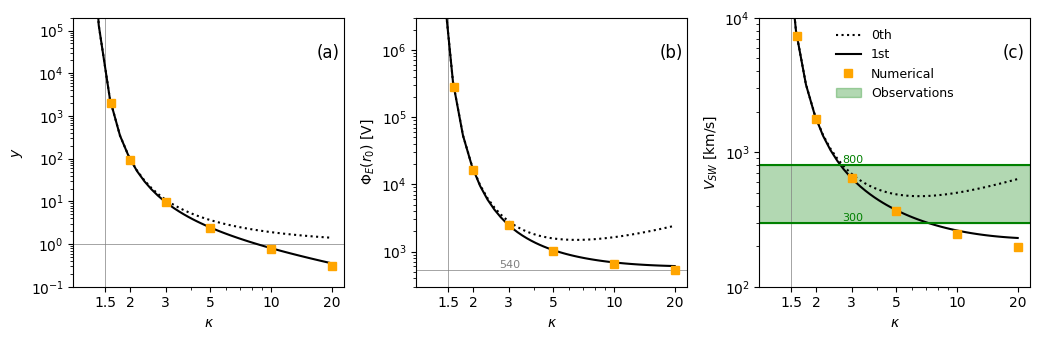

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special, optimize, constants

# --- Physical constants ---
kB = constants.Boltzmann        # Boltzmann constant [J/K]
m_e = constants.m_e             # Electron mass [kg]
m_p = constants.m_p             # Proton mass [kg]
e_charge = constants.e          # Elementary charge [C]
G = 6.674e-11                   # Gravitational constant [SI]
R_sun = 6.957e8                 # Solar radius [m]
M_sun = 1.989e30                # Solar mass [kg]

# --- Temperatures (K) ---
T_e = 1e6
T_p = 2e6

# --- Thermal velocities ---
w_e2 = 2 * kB * T_e / m_e
w_p2 = 2 * kB * T_p / m_p
w_e = np.sqrt(w_e2)
w_p = np.sqrt(w_p2)

# --- Function to solve for V0 given kappa ---
def solve_for_V0(kappa):
    """
    Solve the equation:
        w_p / w_e = (1 + V0^2 / w_e^2) / [sqrt(kappa)(kappa - 1)] *
                     (1 + V0^2 / (kappa w_e^2))^(-kappa) /
                     [0.5 * Gamma(kappa - 0.5)/Gamma(kappa + 1) + B_x0(3/2, kappa - 0.5)/sqrt(pi)]
    """
    def equation(V0):
        x0 = V0**2 / (kappa * w_e2 + V0**2)

        term1 = 1.0 / (np.sqrt(kappa) * (kappa - 1))
        term2 = (1 + V0**2 / w_e2) / (1 + V0**2 / (kappa * w_e2))**kappa
        inc_unreg = special.betainc(1.5, kappa - 0.5, x0) * special.beta(1.5, kappa - 0.5)
        denom = 0.5 * special.gamma(kappa - 0.5) / special.gamma(kappa + 1) + inc_unreg / np.sqrt(np.pi)
        term3 = 1.0 / denom

        # Equation to satisfy: w_e * (RHS) = w_p
        return w_e * term1 * term2 * term3 - w_p

    sol = optimize.root_scalar(equation, bracket=[1e2, 1e9], method='brentq')
    return sol.root if sol.converged else np.nan

# --- Gravitational potential at solar surface ---
Phi_G = m_p * G * M_sun / (6 * R_sun)

# --- Compute terminal velocity ---
def compute_Vsw(phi):
    energy = e_charge * phi - Phi_G
    return np.sqrt(2 * energy / m_p) if energy > 0 else np.nan

# --- Arrays for results ---
kappa_values = [1.6, 2, 3, 5, 10, 20]
V0_values, Phi_values, Vsw_values, Y0_values = [], [], [], []

for kappa in kappa_values:
    V0 = solve_for_V0(kappa)
    Phi = m_e * V0**2 / (2 * e_charge)
    Vsw = compute_Vsw(Phi)
    y0 = V0**2 / (kappa * w_e2)
    
    V0_values.append(V0)
    Y0_values.append(y0)
    Phi_values.append(Phi)
    Vsw_values.append(Vsw)

    print(f"kappa={kappa}, y0={y0:.3f}, Phi={Phi:.1f} V, V_SW={Vsw:.1f}")

# --- Setup plots ---
fig, (ax1_right, ax2, ax3) = plt.subplots(1, 3, figsize=(10.5, 3.5), sharex=True)

# Analytical comparisons
kappa_arr = np.linspace(1.01, 20, 100)
a = w_p / w_e * special.gamma(kappa_arr - 0.5) / (np.sqrt(kappa_arr) * special.gamma(kappa_arr - 1))
Y0_analytical = (kappa_arr / a)**(1 / (kappa_arr - 1))
Y0_analytical_new = Y0_analytical - (kappa_arr + 1) / kappa_arr

ax1_right.axhline(1, ls='-', color='grey', lw=0.5)
ax1_right.axvline(1.5, color='grey', lw=0.5)
ax1_right.plot(kappa_arr, Y0_analytical, color="black", ls=':', label='Analytical')
ax1_right.plot(kappa_arr, Y0_analytical_new, color='black', label='Analytical (new)')
Y0 = np.asarray(V0_values)**2 / (np.asarray(kappa_values) * w_e2)
ax1_right.plot(kappa_values, Y0, color='orange', marker='s', ls='none', label='Num')
ax1_right.set_yscale('log')
ax1_right.set_ylabel('$y$')
ax1_right.set_ylim(0.1, 2e5)
ax1_right.text(0.9, 0.85, "(a)", transform=ax1_right.transAxes, fontsize=12)
ax1_right.set_xlabel('$\kappa$')

# --- (b) Phi vs kappa ---
Phi_analytical = m_e * w_e2 * kappa_arr / (2 * e_charge) * Y0_analytical
Phi_analytical_new = m_e * w_e2 * kappa_arr / (2 * e_charge) * Y0_analytical_new

ax2.axhline(540, color='grey', ls='-', lw=0.5)
ax2.axvline(1.5, color='grey', lw=0.5)
ax2.set_xlabel('$\kappa$')
ax2.plot(kappa_arr, Phi_analytical, ls=':', color='k', label='Analytical')
ax2.plot(kappa_arr, Phi_analytical_new, color='black', label='Analytical (new)')
ax2.plot(kappa_values, Phi_values, marker='s', color='orange', ls='none', label='Num')
ax2.set_ylabel('$\Phi_E(r_0)$ [V]')
ax2.set_yscale('log')
ax2.set_ylim(300, 3e6)
ax2.text(2.7, 540, '540', fontsize=8, color='grey', va='bottom')
ax2.text(0.9, 0.85, "(b)", transform=ax2.transAxes, fontsize=12)

# --- (c) Vsw vs kappa ---
Vsw_analytical = [compute_Vsw(phi) for phi in Phi_analytical]
Vsw_analytical_new = [compute_Vsw(phi) for phi in Phi_analytical_new]

ax3.plot(kappa_arr, np.asarray(Vsw_analytical) / 1e3, ls=':', color='k', label='0th')
ax3.plot(kappa_arr, np.asarray(Vsw_analytical_new) / 1e3, color='black', label='1st')
ax3.loglog(kappa_values, np.asarray(Vsw_values) / 1e3, marker='s', ls='none', color='orange', label='Numerical')
ax3.axvline(1.5, color='grey', lw=0.5)
ax3.set_xlabel('$\kappa$')
ax3.set_ylabel('$V_{SW}$ [km/s]')
ax3.set_yscale('log')
ax3.set_ylim(100, 5e4)
ax3.axhspan(300, 800, color='g', alpha=0.3, label='Observations')
ax3.axhline(300, color='g'); ax3.text(2.7, 300, '300', fontsize=8, color='g', va='bottom')
ax3.axhline(800, color='g'); ax3.text(2.7, 800, '800', fontsize=8, color='g', va='bottom')
ax3.legend(fontsize=9, frameon=False)
ax3.text(0.9, 0.85, "(c)", transform=ax3.transAxes, fontsize=12)
ax3.set_xticks([1.5, 2, 3, 5, 10, 20])
ax3.set_xticklabels([1.5, 2, 3, 5, 10, 20])
ax3.set_ylim(1e2, 1e4)

# --- Save & show ---
plt.tight_layout()
plt.savefig('Figure_1.pdf', bbox_inches='tight')
plt.show()
